<a href="https://colab.research.google.com/github/TulioIsaak/AI-studies/blob/main/Perceptron_MatPlotLib_RNA_UFPEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Passos para criar um perceptron usando TensorFlow:**
*   Importar as bibliotecas necessárias
*   Carregar e preparar o dataset
*   Definir e compilar o modelo do perceptron
*   Treinar o modelo
*   Avaliar o modelo

Importando as bibliotecas e carregando o dataset: Importamos o TensorFlow para criar o modelo e funções do scikit-learn para manipular o dataset e realizar a padronização.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


Carregar e preparar o dataset.

Carregamos o dataset Iris e modificamos o problema para ser uma classificação binária. Dividimos o dataset em conjuntos de treinamento e teste e padronizamos os dados.

In [2]:
# Carregar e preparar o dataset
iris = load_iris()
X = iris.data
y = iris.target

# Vamos converter o problema em uma classificação binária (separar classe 0 de 1 e 2)
y = (y != 0).astype(int)

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Definir e compilar o modelo do perceptron: criamos um modelo sequencial com uma única camada densa com ativação sigmoid, que é adequada para classificação binária.:

In [3]:
# Definir o modelo do perceptron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Ver a topologia do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Treinar o modelo: Treinamos o modelo por 100 épocas com um tamanho de lote de 10.

In [5]:
# Treinar o modelo
history=model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)


Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8667
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8667
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8750
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8750
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8833
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8833
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8833
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8833
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8917
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8917
Epoch 11/

Avaliação do Modelo: Avaliamos o modelo no conjunto de teste e calculamos a acurácia das previsões.

In [6]:
# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 70ms/step
Accuracy: 100.00%


Plotar a função de perda.

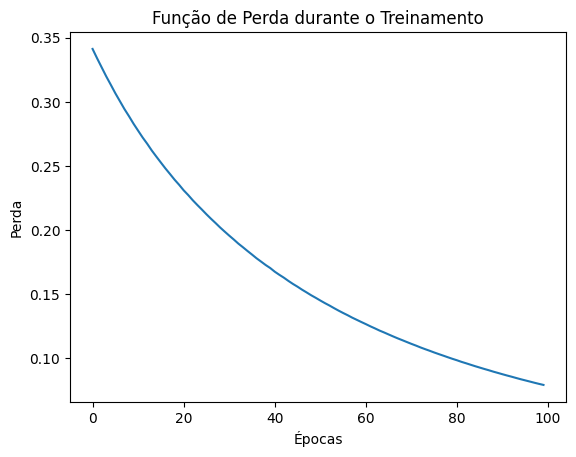

In [7]:
plt.plot(history.history['loss'])
plt.title('Função de Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()